In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#Loading the Dataset in Python
#df = pd.read_csv('data/clean_processed_data.csv')
df = pd.read_csv('data/clean_processed_data.csv')

In [4]:
df.head()

,Unnamed: 0,created_at,source,original_text,polarity,subjectivity,lang,favorite_count,retweet_count,original_author,followers_count,friends_count,possibly_sensitive,hashtags,user_mentions,place
0,0,2022-08-07 22:31:20+00:00,"<a href=""http://twitter.com/download/android"" ...",RT @i_ameztoy: Extra random image (I):\n\nLets...,-1.250000e-01,0.190625,en,4,2,i_ameztoy,20497,2621,NaN,City,i_ameztoy,NaN
1,1,2022-08-07 22:31:16+00:00,"<a href=""http://twitter.com/download/android"" ...",RT @IndoPac_Info: #China's media explains the ...,-1.000000e-01,0.100000,en,691,201,ZIisq,65,272,NaN,"China, Taiwan",IndoPac_Info,NaN
2,2,2022-08-07 22:31:07+00:00,"<a href=""http://twitter.com/download/android"" ...","China even cut off communication, they don't a...",0.000000e+00,0.000000,en,0,0,Fin21Free,85,392,NaN,XiJinping,ZelenskyyUa,Netherlands
3,3,2022-08-07 22:31:06+00:00,"<a href=""http://twitter.com/download/android"" ...","Putin to #XiJinping : I told you my friend, Ta...",1.000000e-01,0.350000,en,0,0,Fin21Free,85,392,NaN,XiJinping,NaN,Netherlands
4,4,2022-08-07 22:31:04+00:00,"<a href=""http://twitter.com/download/iphone"" r...","RT @ChinaUncensored: I’m sorry, I thought Taiw...",-6.938894e-18,0.556250,en,1521,381,VizziniDolores,910,2608,NaN,NaN,ChinaUncensored,"Ayent, Schweiz"


In [5]:
df.tail()

,Unnamed: 0,created_at,source,original_text,polarity,subjectivity,lang,favorite_count,retweet_count,original_author,followers_count,friends_count,possibly_sensitive,hashtags,user_mentions,place
21995,21995,2022-08-06 18:03:29+00:00,"<a href=""http://twitter.com/download/android"" ...",RT @IndoPac_Info: A good infographic of #China...,0.700000,0.600000,en,507,183,VandelayT,62,471,False,"China, Taiwan, ChinaTaiwanCrisis",IndoPac_Info,NaN
21996,21996,2022-08-06 18:03:27+00:00,"<a href=""http://twitter.com/download/android"" ...",RT @IndoPac_Info: A good infographic of #China...,0.700000,0.600000,en,507,183,sashalenik,94,1751,False,"China, Taiwan, ChinaTaiwanCrisis",IndoPac_Info,Gelendzhik
21997,21997,2022-08-06 18:03:27+00:00,"<a href=""http://twitter.com/download/android"" ...",@Reuters Thanks #Pelosi smart move.,0.207143,0.421429,en,0,0,ZeitounRimal,88,0,NaN,Pelosi,Reuters,🇺🇲🇷🇺🇺🇦🇫🇷🇦🇪🇮🇱🏳️‍🌈
21998,21998,2022-08-06 18:03:26+00:00,"<a href=""http://twitter.com/download/android"" ...",RT @IndoPac_Info: #Taiwan people's Desire for ...,0.050000,0.350000,en,199,67,SazzyCowgirl1,537,317,NaN,"Taiwan, China",IndoPac_Info,"Oregon, USA"
21999,21999,2022-08-06 18:03:25+00:00,"<a href=""http://twitter.com/download/android"" ...",RT @IndoPac_Info: #Taiwan people's Desire for ...,0.050000,0.350000,en,199,67,VandelayT,62,471,NaN,"Taiwan, China",IndoPac_Info,NaN


In [13]:
df.shape

(22000, 16)

In [14]:
#Display the Variable Names and their Data Types
df.dtypes

Unnamed: 0              int64
created_at             object
source                 object
original_text          object
polarity              float64
subjectivity          float64
lang                   object
favorite_count          int64
retweet_count           int64
original_author        object
followers_count         int64
friends_count           int64
possibly_sensitive     object
hashtags               object
user_mentions          object
place                  object
dtype: object

In [28]:
# habdling created_at datatype
df['created_at'] =pd.to_datetime(df['created_at'])


In [29]:
#checking datatype
df['created_at'].dtype

datetime64[ns, UTC]

In [15]:
#Count the Number of Non-Missing Values for each Variable
df.count()

Unnamed: 0            22000
created_at            22000
source                22000
original_text         22000
polarity              22000
subjectivity          22000
lang                  22000
favorite_count        22000
retweet_count         22000
original_author       22000
followers_count       22000
friends_count         22000
possibly_sensitive     6191
hashtags              19141
user_mentions         18698
place                 12107
dtype: int64

In [17]:
#Descriptive Statistics
df.describe()

,Unnamed: 0,polarity,subjectivity,favorite_count,retweet_count,followers_count,friends_count
count,22000.000000,22000.000000,22000.000000,22000.000000,22000.000000,2.200000e+04,22000.000000
mean,10999.500000,0.061325,0.283839,852.137318,176.750182,1.796764e+04,1563.114455
std,6350.997297,0.223701,0.290963,3106.077645,498.435765,3.030478e+05,4358.651264
min,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,5499.750000,0.000000,0.000000,2.000000,2.000000,5.700000e+01,137.000000
50%,10999.500000,0.000000,0.200000,115.000000,38.000000,2.840000e+02,487.000000
75%,16499.250000,0.133333,0.468824,655.000000,187.000000,1.324500e+03,1599.000000
max,21999.000000,1.000000,1.000000,65170.000000,17409.000000,1.449852e+07,208360.000000


In [18]:
#get the summary of the categorical variables too. 
df.describe(include = 'all')

,Unnamed: 0,created_at,source,original_text,polarity,subjectivity,lang,favorite_count,retweet_count,original_author,followers_count,friends_count,possibly_sensitive,hashtags,user_mentions,place
count,22000.000000,22000,22000,22000,22000.000000,22000.000000,22000,22000.000000,22000.000000,22000,2.200000e+04,22000.000000,6191,19141,18698,12107
unique,NaN,19588,240,7440,NaN,NaN,1,NaN,NaN,13433,NaN,NaN,2,3553,2557,4409
top,NaN,2022-08-07 11:17:46+00:00,"<a href=""http://twitter.com/download/android"" ...","RT @SpokespersonCHN: ""#Taiwan is part of China...",NaN,NaN,en,NaN,NaN,TrumpThuan,NaN,NaN,False,Taiwan,IndoPac_Info,India
freq,NaN,5,8391,608,NaN,NaN,22000,NaN,NaN,116,NaN,NaN,5961,4045,1752,200
mean,10999.500000,NaN,NaN,NaN,0.061325,0.283839,NaN,852.137318,176.750182,NaN,1.796764e+04,1563.114455,NaN,NaN,NaN,NaN
std,6350.997297,NaN,NaN,NaN,0.223701,0.290963,NaN,3106.077645,498.435765,NaN,3.030478e+05,4358.651264,NaN,NaN,NaN,NaN
min,0.000000,NaN,NaN,NaN,-1.000000,0.000000,NaN,0.000000,0.000000,NaN,0.000000e+00,0.000000,NaN,NaN,NaN,NaN
25%,5499.750000,NaN,NaN,NaN,0.000000,0.000000,NaN,2.000000,2.000000,NaN,5.700000e+01,137.000000,NaN,NaN,NaN,NaN
50%,10999.500000,NaN,NaN,NaN,0.000000,0.200000,NaN,115.000000,38.000000,NaN,2.840000e+02,487.000000,NaN,NaN,NaN,NaN
75%,16499.250000,NaN,NaN,NaN,0.133333,0.468824,NaN,655.000000,187.000000,NaN,1.324500e+03,1599.000000,NaN,NaN,NaN,NaN


In [19]:
#Display the Complete Meta-Data of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22000 entries, 0 to 21999
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          22000 non-null  int64  
 1   created_at          22000 non-null  object 
 2   source              22000 non-null  object 
 3   original_text       22000 non-null  object 
 4   polarity            22000 non-null  float64
 5   subjectivity        22000 non-null  float64
 6   lang                22000 non-null  object 
 7   favorite_count      22000 non-null  int64  
 8   retweet_count       22000 non-null  int64  
 9   original_author     22000 non-null  object 
 10  followers_count     22000 non-null  int64  
 11  friends_count       22000 non-null  int64  
 12  possibly_sensitive  6191 non-null   object 
 13  hashtags            19141 non-null  object 
 14  user_mentions       18698 non-null  object 
 15  place               12107 non-null  object 
dtypes: f

In [20]:
#To check for the duplicates in our data
#df.duplicated().any().sum()
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
21995    False
21996    False
21997    False
21998    False
21999    False
Length: 22000, dtype: bool

In [21]:
#remove the duplicates(if any) we can use the code :

df.drop_duplicates()

,Unnamed: 0,created_at,source,original_text,polarity,subjectivity,lang,favorite_count,retweet_count,original_author,followers_count,friends_count,possibly_sensitive,hashtags,user_mentions,place
0,0,2022-08-07 22:31:20+00:00,"<a href=""http://twitter.com/download/android"" ...",RT @i_ameztoy: Extra random image (I):\n\nLets...,-1.250000e-01,0.190625,en,4,2,i_ameztoy,20497,2621,NaN,City,i_ameztoy,NaN
1,1,2022-08-07 22:31:16+00:00,"<a href=""http://twitter.com/download/android"" ...",RT @IndoPac_Info: #China's media explains the ...,-1.000000e-01,0.100000,en,691,201,ZIisq,65,272,NaN,"China, Taiwan",IndoPac_Info,NaN
2,2,2022-08-07 22:31:07+00:00,"<a href=""http://twitter.com/download/android"" ...","China even cut off communication, they don't a...",0.000000e+00,0.000000,en,0,0,Fin21Free,85,392,NaN,XiJinping,ZelenskyyUa,Netherlands
3,3,2022-08-07 22:31:06+00:00,"<a href=""http://twitter.com/download/android"" ...","Putin to #XiJinping : I told you my friend, Ta...",1.000000e-01,0.350000,en,0,0,Fin21Free,85,392,NaN,XiJinping,NaN,Netherlands
4,4,2022-08-07 22:31:04+00:00,"<a href=""http://twitter.com/download/iphone"" r...","RT @ChinaUncensored: I’m sorry, I thought Taiw...",-6.938894e-18,0.556250,en,1521,381,VizziniDolores,910,2608,NaN,NaN,ChinaUncensored,"Ayent, Schweiz"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21995,21995,2022-08-06 18:03:29+00:00,"<a href=""http://twitter.com/download/android"" ...",RT @IndoPac_Info: A good infographic of #China...,7.000000e-01,0.600000,en,507,183,VandelayT,62,471,False,"China, Taiwan, ChinaTaiwanCrisis",IndoPac_Info,NaN
21996,21996,2022-08-06 18:03:27+00:00,"<a href=""http://twitter.com/download/android"" ...",RT @IndoPac_Info: A good infographic of #China...,7.000000e-01,0.600000,en,507,183,sashalenik,94,1751,False,"China, Taiwan, ChinaTaiwanCrisis",IndoPac_Info,Gelendzhik
21997,21997,2022-08-06 18:03:27+00:00,"<a href=""http://twitter.com/download/android"" ...",@Reuters Thanks #Pelosi smart move.,2.071429e-01,0.421429,en,0,0,ZeitounRimal,88,0,NaN,Pelosi,Reuters,🇺🇲🇷🇺🇺🇦🇫🇷🇦🇪🇮🇱🏳️‍🌈
21998,21998,2022-08-06 18:03:26+00:00,"<a href=""http://twitter.com/download/android"" ...",RT @IndoPac_Info: #Taiwan people's Desire for ...,5.000000e-02,0.350000,en,199,67,SazzyCowgirl1,537,317,NaN,"Taiwan, China",IndoPac_Info,"Oregon, USA"


In [20]:
#Handling Outliers
#1.Detecting Outliers
p0=df.retweet_count.min()
p100=df.retweet_count.max()
q1=df.retweet_count.quantile(0.25)
q2=df.retweet_count.quantile(0.5)
q3=df.retweet_count.quantile(0.75)
iqr=q3-q1

In [21]:
lc = q1 - 1.5*iqr
uc = q3 + 1.5*iqr

In [22]:
lc


-275.5

In [23]:
uc

464.5

In [24]:
print( "p0 = " , p0 ,", p100 = " , p100 ,", lc = " , lc ,", uc = " , uc)

p0 =  0 , p100 =  17409 , lc =  -275.5 , uc =  464.5


<AxesSubplot:>

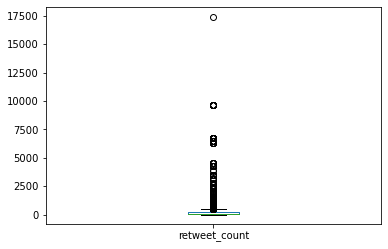

In [25]:
df.retweet_count.plot(kind='box')

In [26]:
#2.Outlier Treatment
df.retweet_count.clip(upper=uc)

0          2.0
1        201.0
2          0.0
3          0.0
4        381.0
         ...  
21995    183.0
21996    183.0
21997      0.0
21998     67.0
21999     67.0
Name: retweet_count, Length: 22000, dtype: float64

<AxesSubplot:>

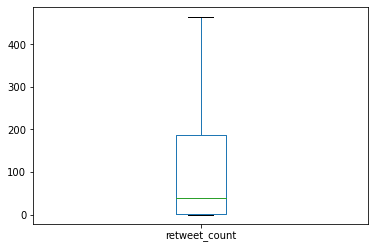

In [27]:
#To finally treat the outliers and make the changes permanent :

df.retweet_count.clip(upper=uc,inplace=True)
df.retweet_count.plot(kind='box')

In [64]:
#Handling Missing Values
#1. Detecting the Missing Values

df.isna()

,Unnamed: 0,created_at,source,original_text,polarity,subjectivity,lang,favorite_count,retweet_count,original_author,followers_count,friends_count,possibly_sensitive,hashtags,user_mentions,place
0,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True
1,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True
2,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False
4,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21995,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
21996,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
21997,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
21998,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False


In [65]:
#find out the percentage of missing values in each variable.

df.isna().sum()/df.shape[0]

Unnamed: 0            0.000000
created_at            0.000000
source                0.000000
original_text         0.000000
polarity              0.000000
subjectivity          0.000000
lang                  0.000000
favorite_count        0.000000
retweet_count         0.000000
original_author       0.000000
followers_count       0.000000
friends_count         0.000000
possibly_sensitive    0.718591
hashtags              0.129955
user_mentions         0.150091
place                 0.449682
dtype: float64

In [70]:
#Handling Missing Values
#2.Missing Value Treatment
df.possibly_sensitive.mode()[0]
df.hashtags .mode()[0]
df.user_mentions .mode()[0]
df.place.mode()[0]
df.possibly_sensitive.fillna(df.possibly_sensitive.mode()[0],inplace=True)
df.hashtags.fillna(df.hashtags.mode()[0],inplace=True)
df.user_mentions.fillna(df.user_mentions.mode()[0],inplace=True)
df.place.fillna(df.user_mentions.mode()[0],inplace=True)

In [71]:
df.isna().sum()

Unnamed: 0            0
created_at            0
source                0
original_text         0
polarity              0
subjectivity          0
lang                  0
favorite_count        0
retweet_count         0
original_author       0
followers_count       0
friends_count         0
possibly_sensitive    0
hashtags              0
user_mentions         0
place                 0
dtype: int64

Text(0.5, 1.0, 'Distribution of the subjectivity')

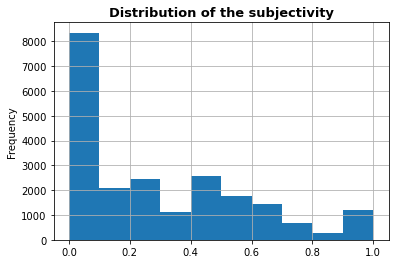

In [19]:
#Analysis using Charts
# or Visualization
#methode to for histogram
df.subjectivity.plot(kind='hist' , grid = True)
plt.title("Distribution of the subjectivity", fontsize = 13, fontweight = 'bold')

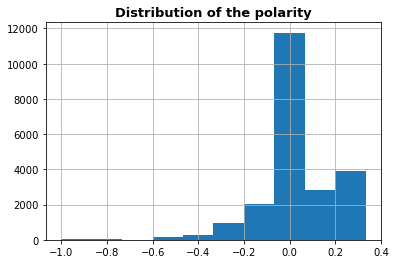

In [75]:
df.polarity.hist();
plt.title("Distribution of the polarity", fontsize = 13, fontweight = 'bold');

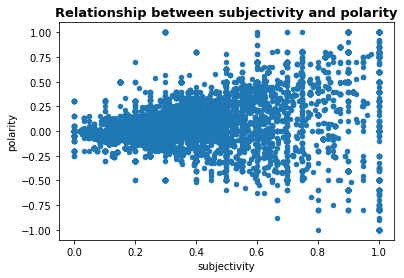

In [5]:
df.plot(x = 'subjectivity', y = 'polarity', kind = 'scatter')
plt.title("Relationship between subjectivity and polarity", fontsize = 13, fontweight = 'bold');

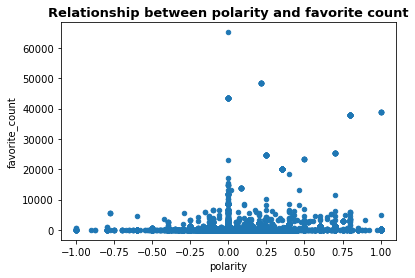

In [6]:
# polarity vs favorite_count
df.plot(x = 'polarity', y = 'favorite_count', kind = 'scatter')
plt.title("Relationship between polarity and favorite count", fontsize = 13, fontweight = 'bold');

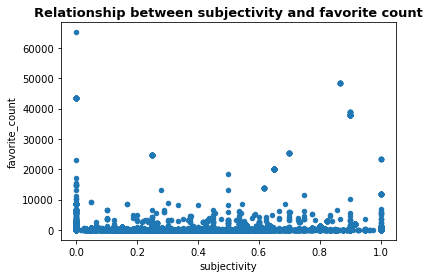

In [7]:
# subjectivity vs favorite_count
df.plot(x = 'subjectivity', y = 'favorite_count', kind = 'scatter')
plt.title("Relationship between subjectivity and favorite count", fontsize = 13, fontweight = 'bold');

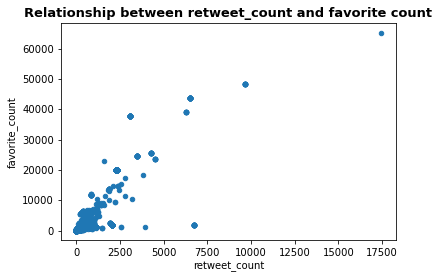

In [8]:
# subjectivity vs favorite_count
df.plot(x = 'retweet_count', y = 'favorite_count', kind = 'scatter')
plt.title("Relationship between retweet_count and favorite count", fontsize = 13, fontweight = 'bold');

In [9]:
#Correlation Matrix
#Finding a correlation between all the numeric variables.

df.select_dtypes(['float64' , 'int64']).corr()

,Unnamed: 0,polarity,subjectivity,favorite_count,retweet_count,followers_count,friends_count
Unnamed: 0,1.000000,0.042714,-0.021185,-0.013423,0.002083,-0.002147,0.019618
polarity,0.042714,1.000000,0.357306,0.161195,0.158880,0.000284,0.001641
subjectivity,-0.021185,0.357306,1.000000,0.111885,0.126861,-0.013147,-0.007131
favorite_count,-0.013423,0.161195,0.111885,1.000000,0.860702,-0.014780,-0.022214
retweet_count,0.002083,0.158880,0.126861,0.860702,1.000000,-0.018868,-0.018275
followers_count,-0.002147,0.000284,-0.013147,-0.014780,-0.018868,1.000000,0.008352
friends_count,0.019618,0.001641,-0.007131,-0.022214,-0.018275,0.008352,1.000000


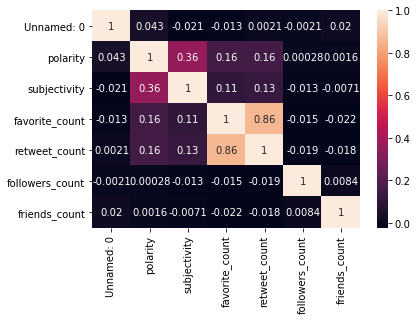

In [10]:
#Heatmap
#Creating a heatmap using Seaborn on the top of the correlation matrix obtained above to visualize the correlation between the different numerical columns of the data. This is done when we have a large number of variables.

sns.heatmap(df.select_dtypes(['float64' , 'int64']).corr(),annot=True)
plt.show()

In [76]:
# inporting packages 
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
import gensim
from gensim.models import CoherenceModel
from gensim import corpora
import pandas as pd
from pprint import pprint
import string
import os
import re
import emoji
import nltk
nltk.download('words')
words = set(nltk.corpus.words.words())

ModuleNotFoundError: No module named 'gensim'

In [69]:
#data loader class
#class DataLoader:
  #def __init__(self,dir_name,file_name):
  #  self.dir_name=dir_name
   # self.file_name = file_name
  #  
 
  #def read_csv(self):
  #  os.chdir(self.dir_name)
  #  tweets_df=pd.read_csv(self.file_name)
  #  return tweets_df

In [70]:
#object creation
#DataLoader_obj= df


In [71]:
#tweets_df=DataLoader_obj.read_csv()
#tweets_df.dropna()

In [72]:
len(df)

0

In [77]:
df.head(1)

,text


In [78]:
df['clean_text'] = df['original_text']

KeyError: 'original_text'

In [79]:
df.head(1)

,text


In [80]:
tweets_df = df
tweets_df

,text


In [81]:
def cleaner(tweet):
    tweet = re.sub("@[A-Za-z0-9]+","",tweet) #Remove @ sign
    tweet = re.sub(r"(?:\@|http?\://|https?\://|www)\S+", "", tweet) #Remove http links
    tweet = " ".join(tweet.split())
    #tweet = ''.join(c for c in tweet if c not in emoji.UNICODE_EMOJI) #Remove Emojis
    tweet = tweet.replace("#", "").replace("_", " ") #Remove hashtag sign but keep the text

    tweet = " ".join(w for w in nltk.wordpunct_tokenize(tweet) \
         if w.lower() in words or not w.isalpha())
    return tweet


tweets_df['clean_text'] = tweets_df['original_text'].map(lambda x: cleaner(x))
tweets_df['clean_text']

KeyError: 'original_text'

In [58]:
class PrepareData:
  def __init__(self,df):
    self.df=df
  def preprocess_data(self):
    
    #tweets_df = self.df.loc[self.df['lang'] =="en"]

    
    #text Preprocessing
    tweets_df['clean_text']=tweets_df['clean_text'].astype(str)
    tweets_df['clean_text'] = tweets_df['clean_text'].apply(lambda x: x.lower())
    tweets_df['clean_text']= tweets_df['clean_text'].apply(lambda x: x.translate(str.maketrans(' ', ' ', string.punctuation)))
    
    #Converting tweets to list of words For feature engineering
    sentence_list = [tweet for tweet in tweets_df['clean_text']]
    word_list = [sent.split() for sent in sentence_list]
    # print(word_list)

    #Create dictionary which contains Id and word 
    word_to_id = corpora.Dictionary(word_list) #generate unique tokens
    #  we can see the word to unique integer mapping
    # print(word_to_id.token2id)
    # using bag of words(bow), we create a corpus that contains the word id and its frequency in each document.
    corpus_1= [word_to_id.doc2bow(tweet) for tweet in word_list]


    return word_list, word_to_id, corpus_1

In [82]:
PrepareData_obj=PrepareData(tweets_df)
#tweets_df['clean_text']
word_list ,id2word,corpus=PrepareData_obj.preprocess_data()

KeyError: 'lang'

In [83]:
id_words = [[(id2word[id], count) for id, count in line] for line in corpus]

NameError: name 'corpus' is not defined

In [84]:
print(id_words)

NameError: name 'id_words' is not defined

In [63]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus,
                                           id2word=id2word,
                                           num_topics=5, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

NameError: name 'gensim' is not defined

In [64]:
pprint(lda_model.print_topics())

Pretty printing has been turned OFF
